## Compare different Under Sampling using Different Datasets

- In this notebook, we will try to compare different under sampling methods on different datasets using a Random Forest Model

In [3]:
# import libraries
import numpy as np
import pandas as pd

# for counting
from collections import Counter

# for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn 
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

# from imblearn
from imblearn.datasets import fetch_datasets
from imblearn.under_sampling import (
    RandomUnderSampler,
    CondensedNearestNeighbour,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    TomekLinks,
    AllKNN,
    NeighbourhoodCleaningRule,
    NearMiss,
    OneSidedSelection,
    InstanceHardnessThreshold
)

In [68]:
rs = RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=True)

In [ ]:
rs.

## Initialize under sampling methods

- Lets create a dictionary that contains the initialization of all our Under Sampling methods

In [70]:
undersampler_dict = {
    
    'random' : RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=True),
    
    'cnn' : CondensedNearestNeighbour(
        sampling_strategy='auto',
        n_neighbors=1,
        random_state=0,n_jobs=2),
    
    'enn' : EditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=2),
  
    'renn' : RepeatedEditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=2,
        max_iter=100),
  
    'tomek' : TomekLinks(
        sampling_strategy='auto',
        n_jobs=2),
    
    'allknn' : AllKNN(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=2),
    
    'ncr' : NeighbourhoodCleaningRule(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=2,
        threshold_cleaning=0.5),
    
    'oss' : OneSidedSelection(
                            sampling_strategy='auto',
                            random_state=0,
                            n_neighbors=1,
                            n_jobs=2),
    
    
    'ncr' : NeighbourhoodCleaningRule(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=2,
        threshold_cleaning=0.5),
    
    'oss' : OneSidedSelection(
                            sampling_strategy='auto',
                            random_state=0,
                            n_neighbors=1,
                            n_jobs=2),
    
    'nm1' : NearMiss(sampling_strategy='auto',
                     version=1,
                     n_neighbors=3,
                     n_jobs=2),
    
    'nm2' : NearMiss(sampling_strategy='auto',
                     version=2,
                     n_neighbors=3,
                     n_jobs=2),
    

    'iht' : InstanceHardnessThreshold(
        estimator=LogisticRegression(max_iter=200, n_jobs=2,random_state=0), 
                                     sampling_strategy='auto',
                                     cv=3,
                                     random_state=0,
                                     n_jobs=2)  
}

In [30]:
# lets define the datasets to use - as a list of datasets names
datasets_ls = [
    'car_eval_34',
    'ecoli',
    'thyroid_sick',
    'arrhythmia',
    'ozone_level'
]

In [45]:
# getting the datasets

data = fetch_datasets()['ecoli']
data

{'data': array([[0.49, 0.29, 0.48, ..., 0.56, 0.24, 0.35],
        [0.07, 0.4 , 0.48, ..., 0.54, 0.35, 0.44],
        [0.56, 0.4 , 0.48, ..., 0.49, 0.37, 0.46],
        ...,
        [0.61, 0.6 , 0.48, ..., 0.44, 0.39, 0.38],
        [0.59, 0.61, 0.48, ..., 0.42, 0.42, 0.37],
        [0.74, 0.74, 0.48, ..., 0.31, 0.53, 0.52]]),
 'target': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

In [51]:
range(len(data.data[0][:]))

range(0, 7)

In [46]:
pd.Series(data.target).value_counts()

-1    301
 1     35
dtype: int64

In [38]:
# lets try to check the data imbalance for all the data in our dataset list

for dataset in datasets_ls:
    data = fetch_datasets()[dataset]
    print(data.DESCR)
    data = pd.Series(data.target)
    print(data.value_counts())

car_eval_34
-1    1594
 1     134
dtype: int64
ecoli
-1    301
 1     35
dtype: int64
thyroid_sick
-1    3541
 1     231
dtype: int64
arrhythmia
-1    427
 1     25
dtype: int64
ozone_level
-1    2463
 1      73
dtype: int64


In [39]:
# can do this way as well
for dataset in datasets_ls:
    data = fetch_datasets()[dataset]
    print(dataset)
    print(Counter(data.target))
    print()

car_eval_34
Counter({-1: 1594, 1: 134})

ecoli
Counter({-1: 301, 1: 35})

thyroid_sick
Counter({-1: 3541, 1: 231})

arrhythmia
Counter({-1: 427, 1: 25})

ozone_level
Counter({-1: 2463, 1: 73})



In [40]:
# lets create a function to train random forest model

def Random_Forest(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=100, n_jobs=2, max_depth=4, random_state=39)
    
    rf.fit(X_train, y_train)
    
    probs_train = rf.predict_proba(X_train)
    probs_test = rf.predict_proba(X_test)
    
    print('ROC score train data: {}'.format(roc_auc_score(y_train,probs_train[:,1])))
    print('ROC score test data: {}'.format(roc_auc_score(y_test,probs_test[:,1])))
    
    return roc_auc_score(y_test, probs_test[:,1])

### train the different datasets and get the roc score using differnt under sampling methods

In [77]:
results_dict = dict()
shapes_dict = dict()

for dataset in datasets_ls:
    print(dataset)
    
    results_dict[dataset] = {}
    shapes_dict[dataset] = {}
    
    data = fetch_datasets()[dataset]
    #columns = list(range(len(data.data[0][:])))
    #columns = list(map(str, columns))
    #X = pd.DataFrame(data = data.data, columns = columns)
    #y = pd.Series(data.target)
    #print(X.head())
    
    # split into Train and Test data
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)
    print(X_train.shape, X_test.shape)
    
    # scale the data before fitting and training
    # as under sampling methods are based on distance and scaling needs to be done
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # run the RF model and get the ROC values
    roc = Random_Forest(X_train, X_test, y_train, y_test)
    
    results_dict[dataset]['full_data'] = roc
    shapes_dict[dataset]['full_data'] = len(X_train)
    
    print()
    
    # now test using different under sampling methods one at a time
    for sampler in undersampler_dict.keys():

        print(sampler)
        X_resampled, y_resampled = undersampler_dict[sampler].fit_resample(X_train, y_train)
        
        roc = Random_Forest(X_resampled, X_test, y_resampled, y_test)
        
        # store the results
        results_dict[dataset][sampler] = roc
        shapes_dict[dataset][sampler] = len(X_resampled)
        
        print()
    print()


car_eval_34
(1209, 21) (519, 21)
ROC score train data: 0.9899121285697768
ROC score test data: 0.9869884682110419

random
ROC score train data: 0.998843796970748
ROC score test data: 0.9890805184202469

cnn
ROC score train data: 0.9838180856689582
ROC score test data: 0.9949994897438514

enn
ROC score train data: 0.9956180610193198
ROC score test data: 0.9847433411572609

renn
ROC score train data: 0.9992112942661094
ROC score test data: 0.986529237677314

tomek
ROC score train data: 0.9907515236209774
ROC score test data: 0.9887743647310949

allknn
ROC score train data: 0.9965735668718017
ROC score test data: 0.986529237677314

ncr
ROC score train data: 0.993632377213286
ROC score test data: 0.9894376977242576

oss
ROC score train data: 0.9904420549581839
ROC score test data: 0.9872435962853352

nm1
ROC score train data: 0.9876286275870043
ROC score test data: 0.9952546178181447

nm2
ROC score train data: 0.9769915597178864
ROC score test data: 0.9473415654658639

iht
ROC score train 

In [78]:
# lets print the results_dict()
print(results_dict)

{'car_eval_34': {'full_data': 0.9869884682110419, 'random': 0.9890805184202469, 'cnn': 0.9949994897438514, 'enn': 0.9847433411572609, 'renn': 0.986529237677314, 'tomek': 0.9887743647310949, 'allknn': 0.986529237677314, 'ncr': 0.9894376977242576, 'oss': 0.9872435962853352, 'nm1': 0.9952546178181447, 'nm2': 0.9473415654658639, 'iht': 0.9957648739667313}, 'ecoli': {'full_data': 0.9589371980676328, 'random': 0.9504830917874396, 'cnn': 0.9601449275362319, 'enn': 0.9601449275362318, 'renn': 0.9565217391304348, 'tomek': 0.967391304347826, 'allknn': 0.9601449275362319, 'ncr': 0.9734299516908214, 'oss': 0.9420289855072463, 'nm1': 0.41666666666666663, 'nm2': 0.6618357487922706, 'iht': 0.40579710144927533}, 'thyroid_sick': {'full_data': 0.9684987997784207, 'random': 0.9683387702345049, 'cnn': 0.9725733981658152, 'enn': 0.9634517141626145, 'renn': 0.9647442604788575, 'tomek': 0.970025235428079, 'allknn': 0.9640425924786115, 'ncr': 0.9682156705853388, 'oss': 0.9713300917092387, 'nm1': 0.79033667754

<BarContainer object of 12 artists>

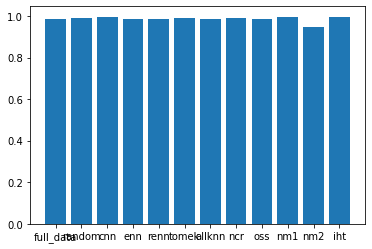

In [84]:
test = results_dict['car_eval_34']
sns.barplot(x = list(test.keys()), y = list(test.values()))
plt.bar(x = list(test.keys()), height = list(test.values()))

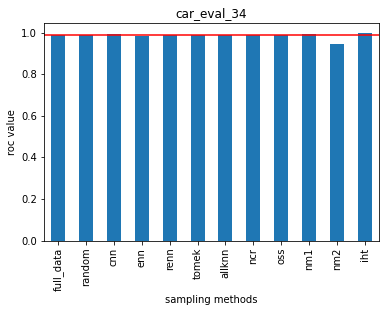

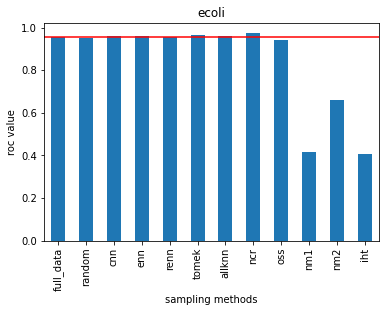

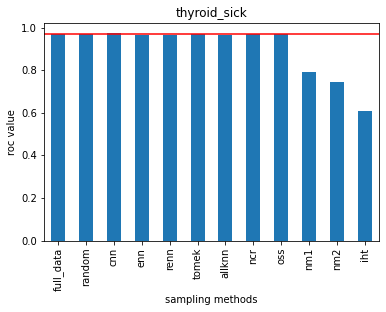

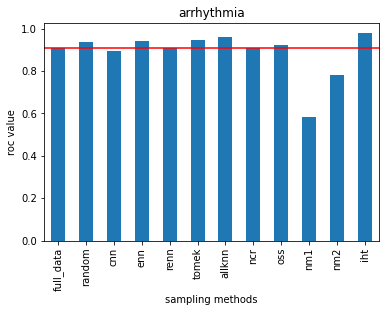

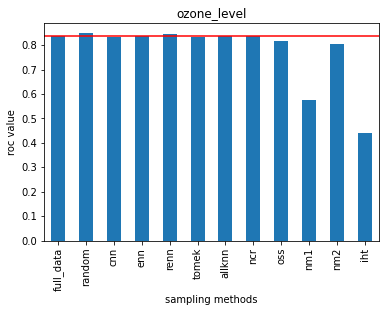

In [90]:
# plotting for all the sampling methods agains the full data 

for dataset in datasets_ls:
    pd.Series(results_dict[dataset]).plot.bar()
    #plt.plot(pd.Series(results_dict[dataset]), kind='bar')
    plt.title('{}'.format(dataset))
    plt.ylabel('roc value')
    plt.xlabel('sampling methods')
    
    plt.axhline(results_dict[dataset]['full_data'],c='red')
    plt.show()

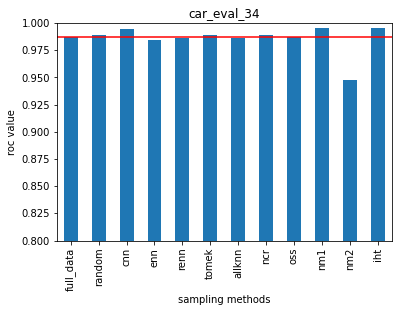

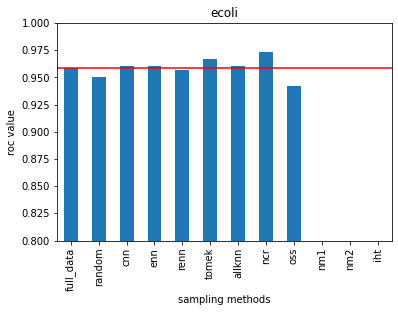

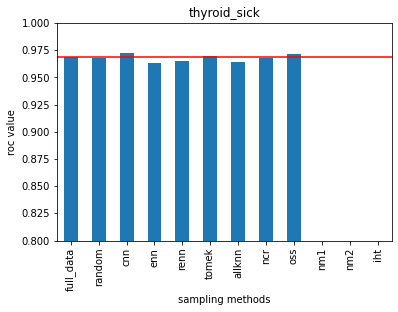

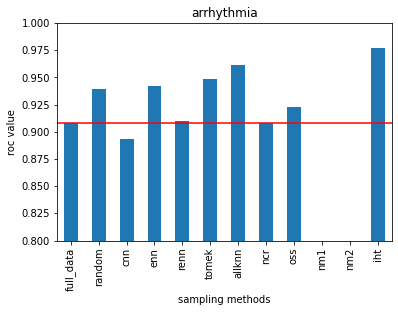

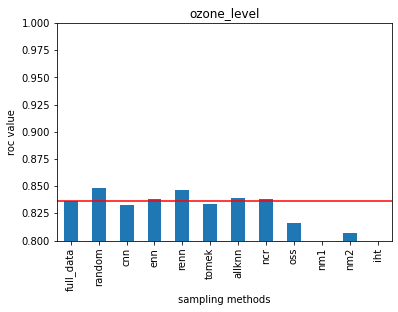

In [94]:
# lets zooming in to more details limiting the y axis

for dataset in datasets_ls:
    pd.Series(results_dict[dataset]).plot.bar()
    #plt.plot(pd.Series(results_dict[dataset]), kind='bar')
    plt.title('{}'.format(dataset))
    plt.ylabel('roc value')
    plt.ylim(0.8, 1)
    plt.xlabel('sampling methods')
    
    plt.axhline(results_dict[dataset]['full_data'],c='red')
    plt.show()

- WE can conclude that different sampling methods works differently for different datasets

In [97]:
shapes_dict

{'car_eval_34': {'full_data': 1209,
  'random': 186,
  'cnn': 398,
  'enn': 1077,
  'renn': 911,
  'tomek': 1201,
  'allknn': 1047,
  'ncr': 1194,
  'oss': 1191,
  'nm1': 186,
  'nm2': 186,
  'iht': 186},
 'ecoli': {'full_data': 235,
  'random': 52,
  'cnn': 53,
  'enn': 204,
  'renn': 192,
  'tomek': 229,
  'allknn': 198,
  'ncr': 224,
  'oss': 134,
  'nm1': 52,
  'nm2': 52,
  'iht': 52},
 'thyroid_sick': {'full_data': 2640,
  'random': 308,
  'cnn': 386,
  'enn': 2495,
  'renn': 2434,
  'tomek': 2609,
  'allknn': 2462,
  'ncr': 2608,
  'oss': 2574,
  'nm1': 308,
  'nm2': 308,
  'iht': 308},
 'arrhythmia': {'full_data': 316,
  'random': 34,
  'cnn': 91,
  'enn': 271,
  'renn': 262,
  'tomek': 312,
  'allknn': 269,
  'ncr': 316,
  'oss': 287,
  'nm1': 34,
  'nm2': 34,
  'iht': 34},
 'ozone_level': {'full_data': 1775,
  'random': 104,
  'cnn': 216,
  'enn': 1668,
  'renn': 1635,
  'tomek': 1764,
  'allknn': 1652,
  'ncr': 1756,
  'oss': 1451,
  'nm1': 104,
  'nm2': 104,
  'iht': 104}}

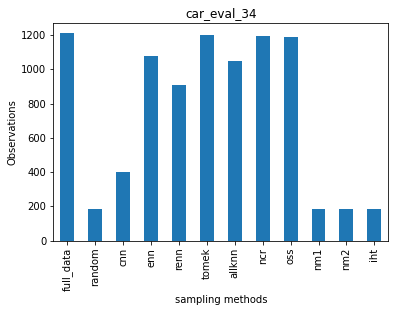

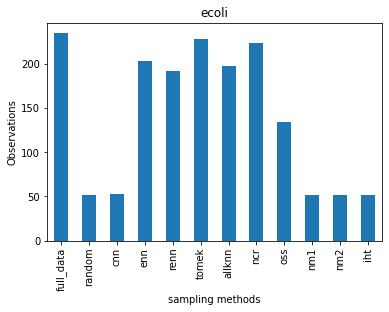

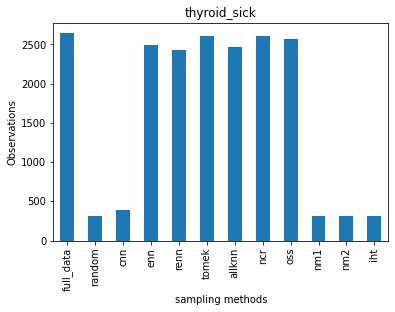

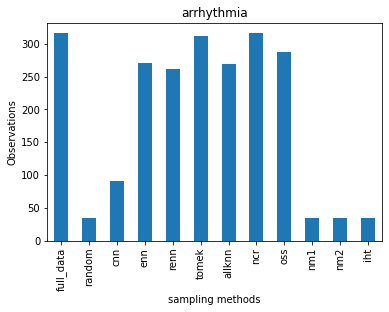

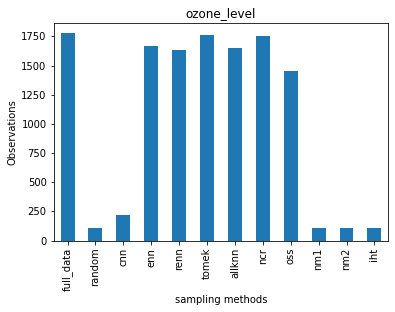

In [99]:
# Lets plot the shapes of the datasets after the
# different under-sampling methods were applied, for comparison

# note that the fixed methods (undersampling, near miss and
# instance hardness threshold) return the smallest datasets

# and from the cleaning methods, the Condensed nearest neighbours are 
# the more aggressive at the time of removing samples from the data

for dataset in datasets_ls:
    pd.Series(shapes_dict[dataset]).plot.bar()
    plt.title('{}'.format(dataset))
    plt.xlabel('sampling methods')
    plt.ylabel('Observations')
    plt.show()